# <b/>Projet 2 : Analysez des données de systèmes éducatifs</b>

**Pascaline Grondein**

**Date début projet : 07/02/2022**


En tant que Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université, j'ai reçu une première mission d’analyse exploratoire concernant une expansion à l'international. 

Par cette étude je dois déterminer : 

 - Quels sont les pays avec un fort potentiel de clients pour nos services ?
 - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
 - Dans quels pays l'entreprise doit-elle opérer en priorité ?


### Table of Contents

* [I. Jeu de données pays](#chapter1)
    * [1 Nettoyage et sélection des variables](#section_1_1)
    * [2 Variable Income Group](#section_1_2)
* [II. Jeu de données indicateurs](#chapter2)
    * [1 Nettoyage et sélection des variables](#section_2_1)
    * [2 Pré-sélection des indicateurs](#section_2_2)
         * [a. Indicateurs démographique : population entre 15 et 24 ans](#section_2_2_1)
         * [b. Indicateurs démographique : croissance démographique](#section_2_2_2)
         * [c. Indicateur d'éducation dans le secondaire](#section_2_2_3)
         * [d. Indicateur d'éducation dans le tertiaire](#section_2_2_4)
         * [e. Indicateur pour internet](#section_2_2_5)
         * [f. Indicateur pour internet](#section_2_2_5)
* [III. Jeu de données final](#chapter3)            
    * [1. Nettoyage et sélection des variables](#section_3_1)
    * [2. Sélection de la variable Population Totale](#section_3_2)
    * [3. Sélection finale des indicateurs](#section_3_3)
* [IV. Calcul et attribution des points par indicateur](#chapter4)
    * [1.  Indicateurs démographiques : population entre 15 et 24 ans](#section_4_1)
    * [2.  Indicateurs démographiques : croissance démographique](#section_4_2)
    * [3.  Indicateur pour l'accès à internet](#section_4_3)
    * [4. Indicateur pour l'éducation dans le secondaire](#section_4_4)
    * [5. Indicateur pour l'éducation dans le tertiaire](#section_4_5)
* [V. Calcul et attribution des points par indicateur](#chapter5)

In [72]:
#importation librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


pct_seuil = 50 #seuil du pourcentage de remplissage pour les indicateurs


High_income = 2 #points attribué aux pays de cette classe de revenu
Middle_income = 1 #points attribué aux pays de cette classe de revenu
Low_income = 0 #points attribué aux pays de cette classe de revenu

boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=1, color='k')
meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

#   <a class="anchor" id="chapter1">I. Sélection du jeu de données pays</a>

##  <a class="anchor" id="section_1_1">1. Nettoyage et sélection des variables</a>

Le fichier EdStatsCountry.csv est un annuaire des pays. 

In [2]:
countries = pd.read_csv('EdStatsCountry.csv')
print('Le fichier comporte',countries.shape[0],'lignes et',countries.shape[1],'colonnes.')

Le fichier comporte 241 lignes et 32 colonnes.


Ce fichier comporte de nombreuses variables, qui ne nous seront pas utiles pour la suite. Une sélection des variables pertinentes est alors nécessaire.

In [3]:
countries.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

Dans le cadre de notre étude, il nous faut déterminer quels sont les pays avec un fort potentiel de clients pour nos services. La start-up Academy proposant des contenus de formation en ligne pour un public de niveau lycée et université, les variables pouvant nous intéresser sont : 

Pour l'indentification : 
  - Country Code : code du pays
  - Short Name : nom du pays raccourci
  
Pour la localisation et la classification :
  - Region : Zone géographique du pays
  - Income group : classement du pays en fonction du niveau de revenu
  
Toutes ces variables sont au bon format (object), donc inutile de les convertir.
  
On peut réduire le fichier à ces colonnes:

In [4]:
countries = countries[['Country Code','Short Name','Region','Income Group']]

Regardons les valeurs manquantes pour ce fichier :

Ce fichier comporte 54 valeurs manquantes.


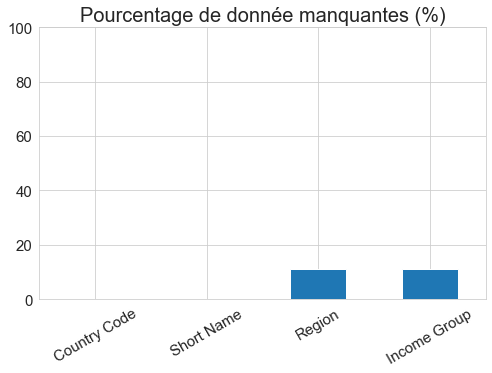

In [5]:
#On collecte le nombre de valeurs manquanets par variable
nb_na = countries.isnull().sum() 
print ('Ce fichier comporte',nb_na.sum(),'valeurs manquantes.' )

#On calcule le pourcentage de valeurs manquantes par variabels
index = countries.index
pct_manquant = pd.DataFrame(((nb_na/len(index))*100).astype(int), columns=['Pourcentage de données manquantes (%)']) 


#On trace les pourcentages de valeurs manquantes, en retirant les variables avec un pourcentages nul ou supérieur au seuil
sns.set_style("whitegrid")
pct_manquant.plot.bar(x=None, y=None, ylim = [0,100], sort_columns = pct_manquant['Pourcentage de données manquantes (%)'],legend=False,figsize=(8, 5))
plt.title("Pourcentage de donnée manquantes (%)",fontsize=20)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Les variables sélectionnées ont peu de valeurs manquantes, il est alors possible d'ignorer les lignes concernées.

Retirons les pays n'ayant aucune région ou groupe de revenu indiqué.

In [6]:
countries = countries.dropna(axis = 0)
print('Il reste',countries.shape[0],'pays.')

Il reste 214 pays.


Vérifions s'il existe des doublons.

In [7]:
countries.loc[countries['Country Code'].duplicated(keep=False),:]

,Country Code,Short Name,Region,Income Group


Aucun doublon n'est détecté.

##  <a class="anchor" id="section_1_2">2. Variable Income Group</a>

Intéressons nous à la variable 'Income Group'.

In [8]:
countries['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income',
       'Lower middle income', 'High income: OECD'], dtype=object)

La catégorie "Income group" compte 5 groupes : 

  - High income (OECD) 
  - High income (nonOECD)
  - Upper middle income
  - Lower middle income
  - Low Income
  
OECD : Organisation for Economic Co-operation and Development, ou Organisation de Coopération et de Développement     Économiques, une organisation économique intergouvernementale avec 38 pays membres.
 
On peut regarder la répartition des pays dans les différents groupes :

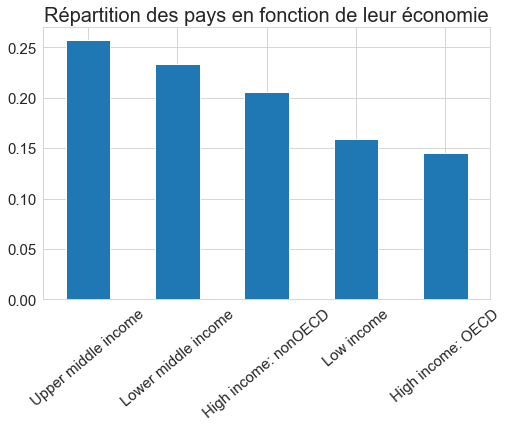

In [9]:
sns.set_style("whitegrid")
countries["Income Group"].value_counts(normalize=True).plot(kind='bar',figsize=(8, 5))
plt.title("Répartition des pays en fonction de leur économie",fontsize = 20)
plt.xticks(rotation=40, horizontalalignment="center",fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Il pourrait sembler intéressant de sélectionner les pays appartenant aux groupes "High Income" (OECD et non-OECD) et "Upper middle income". Cependant, le seul niveau économique ne peut rendre compte d'autres facteurs primordiaux comme l'accès à internet ou le niveau d'éducation. Se priver d'un marché possiblement importante d'une population ayant le niveau éducatif suffisant et accès à internet sous seul prétexte du niveau économique insuffisant de leur pays de résidence serait une mauvaise option d'un point de vue économique. De même, aucune pré-sélection ne sera faite en fonction de la région géographique.

Cependant, le niveau Income d'un pays peut aider au classement final des pays. Pour cela, attribuons des points en fonctions du niveau : 

  - High income (OECD & nonOECD) : +2
  - Middle income : +1
  - Low Income : +0

In [10]:
countries.loc[countries['Income Group'].isin(['High income: OECD','High income: nonOECD']),'Income Point'] = High_income
countries.loc[countries['Income Group'].isin(['Upper middle income','Lower middle income']),'Income Point'] = Middle_income
countries.loc[countries['Income Group'] == 'Low income','Income Point'] = Low_income

In [11]:
countries.head(3)

,Country Code,Short Name,Region,Income Group,Income Point
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2.0
1,AFG,Afghanistan,South Asia,Low income,0.0
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,1.0


In [12]:
print('Le fichier comporte désormais',countries.shape[0],'lignes et',countries.shape[1],'colonnes.')

Le fichier comporte désormais 214 lignes et 5 colonnes.


# <a class="anchor" id="chapter2">II. Jeu de données indicateurs  </a>

## <a class="anchor" id="section_2_1">1. Nettoyage et sélection des variables</a>

Le fichier EdStatsSeries.csv est un annuaire des indicateurs utilisés dans l'étude. 

In [13]:
series = pd.read_csv('EdStatsSeries.csv')
print('Le fichier comporte',series.shape[0],'lignes et',series.shape[1],'colonnes.')

Le fichier comporte 3665 lignes et 21 colonnes.


In [14]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

Comme pour le fichier annuaire des pays, le nombre de variable est important, il est donc nécessaire de sélectionner les pertinentes.

Dans le cadre de notre étude, il nous faut estimer si un pays peut être intéressant pour le développement d'un système éducatif en ligne. La start-up Academy proposant des contenus de formation en ligne pour un public de niveau lycée et université, les variables pouvant nous intéresser sont : 

Pour l'indentification : 
  - Series Code : code de l'indicateur
  - Indicator Name : nom de l'indicateur
  - Long definition : définition de l'indicateur
  
Pour la classification
  - Topic : nom du pays raccourci
   
Toutes ces variables sont au bon format (object), donc inutile de les convertir.
  
On peut réduire le fichier à ces colonnes:

In [15]:
series = series[['Series Code','Indicator Name','Long definition','Topic']]

Regardons les valeurs manquantes pour ce fichier :

In [16]:
#On collecte le nombre de valeurs manquanets par variable
nb_na = series.isnull().sum() 
print ('Ce fichier comporte',nb_na.sum(),'valeurs manquantes.' )

Ce fichier comporte 0 valeurs manquantes.


Vérifions s'il existe des doublons.

In [17]:
series.loc[series['Series Code'].duplicated(keep=False),:]

,Series Code,Indicator Name,Long definition,Topic


Aucun doublon n'est détecté.

Intéressons nous maintenant à la variable Topic.

In [18]:
series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

Pour l'étude, il serait intéressant de choisir 5 ou 6 indicateurs, pour illustrer les problématiques suivantes

  - Démographie : population susceptible d'être intéressés par des cours en ligne niveau lycée/fac, évolution démographique
  - Education dans secondaire : taux d'enfants ou adolescents scolarisés, le taux d'alphabétisation, niveau d'éducation
  - Etudes supérieures : le taux de jeunes impliqués dans des études supérieures, ou au contraire sans diplômes
  - L'accès à internet
  - Marché de l'emploi : taux de chômage chez les jeunes,
  
Parmi les indicateurs, on peut retenir ceux ayant les sujets suivant : 

Pour la démographie et son évolution:
   - Attainment (733)
   - Population (213 indicateurs)
   - Health: Population: Dynamics (1 indicateur)
   - Health: Population: Structure (13 indicateurs)
   
Pour l'éducation dans le secondaire :
   - Education Equality (426 indicateurs)
   - Secondary (256 indicateurs)
   
Pour les études supérieurs (secteur tertiaire) :
   - Tertiary (158 indicateurs)
   - Post-Secondary/Non-Tertiary (19 indicateurs)
   
Pour l'accès à internet :
   - Infrastructure: Communications (2 indicateurs)
   
Pour le marché de l'emploi
   - Social Protection & Labor: Labor force structure (11 indicateurs)
   - Laber (3 indicateurs)
   
On peut déjà réduire le jeu données aux indicateurs de ces sujets.  

In [19]:
series = series[series['Topic'].isin(['Attainment','Education Equality','Infrastructure: Communications',
                                     'Education Management Information Systems (SABER)','Tertiary Education (SABER)',
                                     'Literacy','Secondary','Tertiary','Social Protection & Labor: Labor force structure',
                                     'Laber','Health: Population: Structure','Population','Health: Population: Dynamics',
                                     'Post-Secondary/Non-Tertiary'])]

print('Il reste',len(series),'indicateurs possibles')

Il reste 1907 indicateurs possibles


## <a class="anchor" id="section_2_2">2. Sélection des indicateurs</a> 

###  <a class="anchor" id="section_2_2_1">a. Indicateurs démographique : population entre 15 et 24 ans</a>

Sélectionnons en premier les indicateurs pour la démographie. La population visée étant celle pour des cours niveau lycée et fac, on peut estimée une fouchette d'âge de 15-24 ans. On s'intéresse à la population totale, indépendamment du genre, et sans contexte ou condition. On peut alors enlever les indicateurs specifique "female" et "male", "schooling", "primary","secondary","tertiary" en retirant ceux ayant un code contenant 'FE', 'MA', 'MF', 'SCHL', 'PRM','SEC'.

In [20]:
ind_demo = series[series['Topic'].isin(['Attainment','Population','Health: Population: Structure'])]
ind_demo = ind_demo[ind_demo['Series Code'].str.contains('1524|1519|2024')]
ind_demo = ind_demo[~ind_demo['Series Code'].str.contains('FE|MA|MF|SCHL|PRM|SEC')]
#ind_demo['Series Code'].unique()
print('Il reste',len(ind_demo),'indicateurs possibles.')
ind_demo

Il reste 9 indicateurs possibles.


,Series Code,Indicator Name,Long definition,Topic
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Attainment
5,BAR.NOED.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with no edu...,Attainment
30,BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, age 15-19, total is t...",Attainment
34,BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24,...","Population in thousands, age 20-24, total is t...",Attainment
271,BAR.TER.CMPT.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with tertia...,Attainment
275,BAR.TER.CMPT.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with tertia...,Attainment
301,BAR.TER.ICMP.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with tertia...,Attainment
305,BAR.TER.ICMP.2024.ZS,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with tertia...,Attainment
2506,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population


In [21]:
#ind_demo['Long definition'].unique()

On pré-sélectionne trois indicateurs.

In [22]:
ind_demo = ind_demo.loc[ind_demo['Series Code'].isin(['BAR.POP.1519','BAR.POP.2024','SP.POP.1524.TO.UN'])]
ind_demo

,Series Code,Indicator Name,Long definition,Topic
30,BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, age 15-19, total is t...",Attainment
34,BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24,...","Population in thousands, age 20-24, total is t...",Attainment
2506,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population


In [23]:
ind_demo['Long definition'].unique()

array(['Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee.',
       'Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee.',
       'Population, ages 15-24, total is the total population age 15-24.'],
      dtype=object)

Les trois indicateurs sont gardés, la sélections finale se faisant avec le taux de remplissage dans le jeu de données principal.

### <a class="anchor" id="section_2_2_2">b. Indicateurs démographique : croissance démographique</a>

Un indicateur pour l'évolution démographique est utile pour notre étude, une population croissante étant un marché intéressant pour les formations en ligne pour une population jeune.

In [24]:
ind_demo_evo = series[series['Topic'] == 'Health: Population: Dynamics']
ind_demo_evo

,Series Code,Indicator Name,Long definition,Topic
2589,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Health: Population: Dynamics


In [25]:
ind_demo_evo['Long definition'].unique()

array(['Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.'],
      dtype=object)

### <a class="anchor" id="section_2_2_3">c. Indicateur d'éducation dans le secondaire</a>

Plusieurs types d'indicateurs pour mesurer le taux de développement de l'éducation dans le secondaire existent. Pour cette étude, j'ai décidé de me concentrer sur le taux de fréquentation des établissement secondaire, privés et publics.

In [26]:
ind_sec = series[series['Topic'].isin(['Education Equality','Secondary'])]

On peut s'intéresser au taux de fréquentation l'éducation dans le secondaire, indépendamment du genre.

In [27]:
ind_sec = ind_sec[ind_sec['Indicator Name'].str.contains('Secondary|secondary','Enrolment|enrolment')]
ind_sec = ind_sec[~ind_sec['Indicator Name'].str.contains('Primary|primary|Survival|female|male|expectancy|Repetition|repeaters|Drop-out|duration|Duration|Grade|grade')]
ind_sec = ind_sec[ind_sec['Series Code'].str.contains('ENRL','ENRR')]

print('Il reste',len(ind_sec),'indicateurs possibles.')
ind_sec

Il reste 4 indicateurs possibles.


,Series Code,Indicator Name,Long definition,Topic
2294,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary
2298,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (nu...",Total number of students enrolled in general p...,Secondary
2303,SE.SEC.ENRL.VO,"Enrolment in secondary vocational, both sexes ...",Total number of students enrolled in vocationa...,Secondary
2306,SE.SEC.ENRL.VO.ZS,Percentage of students in secondary education ...,Total number of students enrolled in vocationa...,Secondary


On garde le premier, plus général, indépendant du genre.

In [28]:
ind_edu_secondary = ind_sec.loc[ind_sec['Series Code']== 'SE.SEC.ENRL']
ind_edu_secondary

,Series Code,Indicator Name,Long definition,Topic
2294,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary


### <a class="anchor" id="section_2_2_4">d. Indicateur d'éducation dans le tertiaire</a>

Pour les indicateurs pour les éducations dans le tertiaire, on peut s'intéresser au taux de taux de fréquentation du tertiaire, indépendamment du genre, du type d'établissement (public, private). On veut un taux global, non genré.

In [29]:
ind_ter = series[series['Topic'] == 'Tertiary']
ind_ter = ind_ter[~ind_ter['Series Code'].str.contains('F|M')]
ind_ter = ind_ter[~ind_ter['Long definition'].str.contains('public|private|female|age|graduates')]
print('Il reste',len(ind_ter),'indicateurs possibles.')
ind_ter

Il reste 3 indicateurs possibles.


,Series Code,Indicator Name,Long definition,Topic
3257,UIS.OE.56.40510,Total outbound internationally mobile tertiary...,Students who have crossed a national or territ...,Tertiary
3533,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary
3552,UIS.thDur.4.A.GPV,Theoretical duration of post-secondary non-ter...,Number of grades (years) in post-secondary edu...,Tertiary


Après recherche on choisit un indicateur donnant le nombre d'étudiants pour 100 000 habitants impliqués dans des études suprérieures. 

In [30]:
ind_edu_tertiary = ind_ter.loc[ind_ter['Series Code']== 'UIS.TE_100000.56']
ind_edu_tertiary

,Series Code,Indicator Name,Long definition,Topic
3533,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary


In [31]:
ind_edu_tertiary['Long definition'].unique()

array(['Number of students enrolled in tertiary education in a given academic year per 100,000 inhabitants. It is calculated by dividing the total number of students enrolled in tertiary education in a given academic year by the country’s population and multiplying the result by 100,000. This indicator shows the general level of participation in tertiary education by indicating the proportion (or density) of students within a country’s population.'],
      dtype=object)

### <a class="anchor" id="section_2_2_5">e. Indicateur pour internet</a> 

In [32]:
ind_internet = series[series['Topic'] == 'Infrastructure: Communications']
ind_internet

,Series Code,Indicator Name,Long definition,Topic
610,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computer...,Infrastructure: Communications
611,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,Infrastructure: Communications


Deux indicateurs sont possibles pour rendre compte de l'accès à internet. Gardons les pour le moment.

### <a class="anchor" id="section_2_2_5">f. Indicateur pour le marché de l'emploi</a> 

In [33]:
ind_work = series[series['Topic'].isin(['Social Protection & Labor: Labor force structure','Laber'])]
ind_work = ind_work[~ind_work['Indicator Name'].str.contains('female|male')]
ind_work = ind_work.loc[ind_work['Series Code'].isin(['SL.TLF.TOTL.IN','SL.UEM.NEET.ZS'])]
ind_work

,Series Code,Indicator Name,Long definition,Topic
2394,SL.TLF.TOTL.IN,"Labor force, total",Labor force comprises people ages 15 and older...,Social Protection & Labor: Labor force structure
2397,SL.UEM.NEET.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or...",Laber


In [34]:
#ind_work['Long definition'].unique()

On garde deux indicateurs, l'un pour la force de travail à partir de 15 ans, l'autre pour la proportion de jeunes sans emplois, non impliqués dans des études supérieures ou dans une formation.

In [35]:
indicators = pd.concat([ind_demo,ind_demo_evo,ind_edu_secondary,ind_edu_tertiary,ind_internet,ind_work],axis = 0,ignore_index = True)
indicators

,Series Code,Indicator Name,Long definition,Topic
0,BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, age 15-19, total is t...",Attainment
1,BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24,...","Population in thousands, age 20-24, total is t...",Attainment
2,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population
3,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Health: Population: Dynamics
4,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary
5,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary
6,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computer...,Infrastructure: Communications
7,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,Infrastructure: Communications
8,SL.TLF.TOTL.IN,"Labor force, total",Labor force comprises people ages 15 and older...,Social Protection & Labor: Labor force structure
9,SL.UEM.NEET.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or...",Laber


On garde finalement 10 indicateurs en tout pour la présélection.

# <a class="anchor" id="chapter3">III. Jeu de données principal  </a>

## <a class="anchor" id="section_3_1">1. Nettoyage et sélection des variables</a>

Ce fichier est le fichier principal du jeu de données. 

In [36]:
data = pd.read_csv('EdStatsData.csv')
print('Le fichier comporte',data.shape[0],'lignes et',data.shape[1],'colonnes.')

Le fichier comporte 886930 lignes et 70 colonnes.


In [37]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Le fichier présente les valeurs associées à un indicateur et un pays précis pour chaque année entre 1970 et 2017, puis tous les cinq ans entre 2020 et 2100. Pour l'étude menée, il n'est pas nécessaire d'étudier les données trop anciennes, les années entre 1970 et 2002 sont donc retirées. De plus, les projections ne sont pour l'instant inutiles, les années après 2017 sont également enlevées.

In [38]:
data_subset = pd.concat([data[['Country Code','Indicator Code']],data.loc[:,"2002":"2017"]],axis = 1,ignore_index = False)
#data_subset.dtypes

Les variables gardées sont au bon format.

Jetons un oeil aux valeurs manquantes.

Ce fichier comporte 12134634 valeurs manquantes.


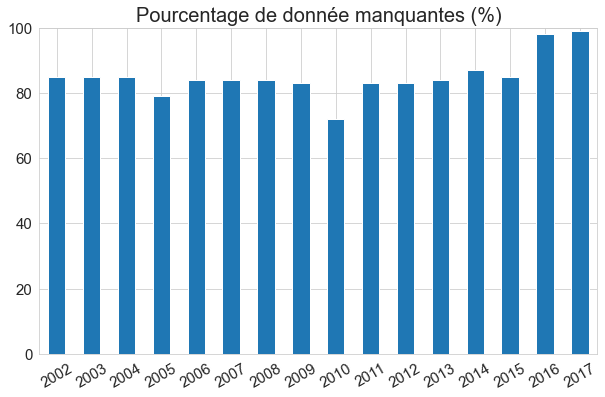

In [39]:
#On collecte le nombre de valeurs manquanets par variable
nb_na = data_subset.isnull().sum() 
print ('Ce fichier comporte',nb_na.sum(),'valeurs manquantes.' )

#On calcule le pourcentage de valeurs manquantes par variabels
index = data_subset.index
pct_manquant = pd.DataFrame(((nb_na/len(index))*100).astype(int), columns=['Pourcentage de données manquantes (%)']) 

#On trace les pourcentages de valeurs manquantes, en retirant les variables avec un pourcentages nul ou supérieur au seuil
sns.set_style("whitegrid")
pct_manquant = pct_manquant.loc[pct_manquant['Pourcentage de données manquantes (%)'] > 0]
pct_manquant.plot.bar(x=None, y=None, ylim = [0,100], sort_columns = pct_manquant['Pourcentage de données manquantes (%)'],legend=False,figsize=(10, 6))
plt.title("Pourcentage de donnée manquantes (%)",fontsize = 20)
plt.xticks(rotation=30, horizontalalignment="center",fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [40]:
column = pct_manquant["Pourcentage de données manquantes (%)"]
min_value = column.idxmin()

print('L année avec le moins de données manquantes semble être', min_value, '. Nous utiliserons cette années pour comparer les pays entre eux.') 

L année avec le moins de données manquantes semble être 2010 . Nous utiliserons cette années pour comparer les pays entre eux.


In [41]:
data_subset = data_subset[['Country Code','Indicator Code','2010']]
data_subset.shape

(886930, 3)

On peut également retirer les pays ayant une valeur nulle pour l'année de référence.

In [42]:
data_subset = data_subset.loc[~data_subset['2010'].isnull()]
data_subset.shape

(242442, 3)

Enfin, on retire les pays non listés dans le jeu de données des pays.

In [43]:
list_countries = countries['Country Code'].unique()
data_subset = data_subset[data_subset['Country Code'].isin(list_countries)]
print('Le fichier comporte désormais',data_subset.shape[0],'lignes et',data_subset.shape[1],'colonnes.')

Le fichier comporte désormais 233465 lignes et 3 colonnes.


## <a class="anchor" id="section_3_2">2. Sélection de la variable Population Totale</a>

Pour la suite de notre étude, la population globale sera utile. Nous allons donc la sélectionner et la conserver pour plus tard.

In [44]:
pop_tot = series.loc[series['Series Code'] == 'SP.POP.TOTL']
pop_tot

,Series Code,Indicator Name,Long definition,Topic
2590,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,Health: Population: Structure


On sélectionne les données dans le fichier de data globale et on vérifie qu'il n'y a pas de valeurs manquantes.

In [45]:
pop_totale = data_subset.loc[data['Indicator Code'] == 'SP.POP.TOTL']
pop_totale.isnull().sum()
#pop_totale

Country Code      0
Indicator Code    0
2010              0
dtype: int64

## <a class="anchor" id="section_3_3">3. Sélection finale des indicateurs</a>

On peut désormais finir la sélection finale des indicateurs en regardant le taux de remplissage de ceux pré-sélectionnés.

In [46]:
data_subset = data_subset.loc[data_subset['Indicator Code'].isin(indicators['Series Code'].unique())]

On ne garde que les indicateurs dont le taux de taux de remplissage est supérieur au seuil fixé en début de code. 

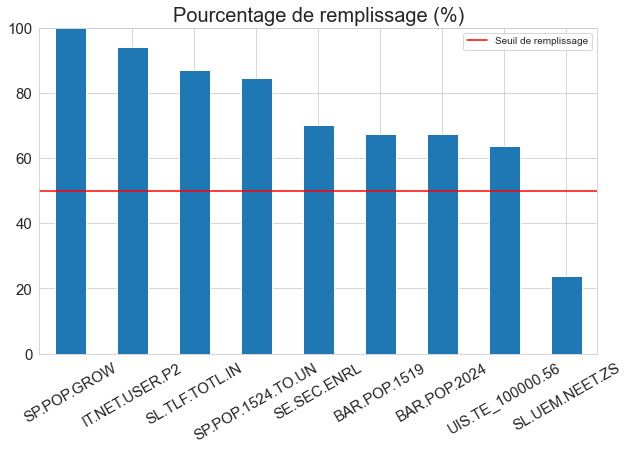

In [47]:
ind_select = data_subset['Indicator Code'].value_counts()

#On calcule le pourcentage de valeurs manquantes par variabels
index = ind_select.index
pct_remplissage = (ind_select/len(countries))*100.0
pct_remplissage

#On trace les pourcentages de valeurs manquantes, en retirant les variables avec un pourcentages nul ou supérieur au seuil
sns.set_style("whitegrid")
pct_remplissage.plot.bar(x=None, y=None, ylim = [0,100], sort_columns = pct_manquant['Pourcentage de données manquantes (%)'],legend=False,figsize = (10,6))
plt.title("Pourcentage de remplissage (%)",fontsize = 20)
plt.xticks(rotation=30, horizontalalignment="center",fontsize = 15)
plt.yticks(fontsize = 15)
line_seuil = plt.axhline(y=pct_seuil, color='r', linestyle='-')
plt.legend([line_seuil],['Seuil de remplissage'])

In [48]:
pct_remplissage.loc[pct_remplissage>pct_seuil]
ind_final = pct_remplissage.loc[pct_remplissage>pct_seuil]
indicators_final = indicators.loc[indicators['Series Code'].isin(ind_final.index)]
print('Les indicateurs sélectionnés sont :')
indicators_final = indicators_final.reset_index(drop = True)
indicators_final

Les indicateurs sélectionnés sont :


,Series Code,Indicator Name,Long definition,Topic
0,BAR.POP.1519,"Barro-Lee: Population in thousands, age 15-19,...","Population in thousands, age 15-19, total is t...",Attainment
1,BAR.POP.2024,"Barro-Lee: Population in thousands, age 20-24,...","Population in thousands, age 20-24, total is t...",Attainment
2,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population
3,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Health: Population: Dynamics
4,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary
5,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary
6,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,Infrastructure: Communications
7,SL.TLF.TOTL.IN,"Labor force, total",Labor force comprises people ages 15 and older...,Social Protection & Labor: Labor force structure


Cependant, 8 indicateurs représente trop de données. Parmi ces indicateurs finaux nous choisiront :
 
  - SP.POP.1524.TO.UN : Population, ages 15-24, total
  - SP.POP.GROW : Population growth (annual %)
  - IT.NET.USER.P2 : Internet users (per 100 people)
  - SE.SEC.ENRL : Enrolment in secondary education, both sexes
  - UIS.TE_100000.56 : Enrolment in tertiary education per 100,000 in

In [49]:
indicators_final = indicators_final.loc[indicators_final['Series Code'].isin(['SP.POP.1524.TO.UN','SP.POP.GROW','IT.NET.USER.P2','SE.SEC.ENRL','UIS.TE_100000.56'])]
indicators_final = indicators_final.reset_index(drop = True)
indicators_final

,Series Code,Indicator Name,Long definition,Topic
0,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population
1,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Health: Population: Dynamics
2,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary
3,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary
4,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,Infrastructure: Communications


In [50]:
indicators_final['Long definition'].unique()

array(['Population, ages 15-24, total is the total population age 15-24.',
       'Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.',
       'Total number of students enrolled at public and private secondary education institutions regardless of age.',
       'Number of students enrolled in tertiary education in a given academic year per 100,000 inhabitants. It is calculated by dividing the total number of students enrolled in tertiary education in a given academic year by the country’s population and multiplying the result by 100,000. This indicator shows the general level of participation in tertiary education by indicating the proportion (or density) of students within a country’s population.',
       'Internet users are individuals who have used the Internet 

On peut alors retirer du jeu de données principal les indicateurs non retenus.

In [51]:
data_subset = data_subset.loc[data_subset['Indicator Code'].isin(indicators_final['Series Code'].unique())]
print('Le fichier comporte désormais',data_subset.shape[0],'lignes et',data_subset.shape[1],'colonnes.')

Le fichier comporte désormais 882 lignes et 3 colonnes.


In [52]:
data_subset.isnull().sum()

Country Code      0
Indicator Code    0
2010              0
dtype: int64

Il n'y a aucune valeurs manquantes.

In [53]:
data_subset.loc[data_subset[['Country Code','Indicator Code']].duplicated(keep=False),:]

,Country Code,Indicator Code,2010


Aucun doublon détecté.

# <a class="anchor" id="chapter4">IV. Calcul et attribution des points par indicateur  </a>

In [54]:
indicators_final

,Series Code,Indicator Name,Long definition,Topic
0,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop...",Population
1,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Health: Population: Dynamics
2,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Total number of students enrolled at public an...,Secondary
3,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...,Tertiary
4,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...,Infrastructure: Communications


## <a class="anchor" id="section_4_1">1.  Indicateurs démographiques : population entre 15 et 24 ans</a>

On crée le sous-ensemble avec les valeurs liées au seul indicateur de population 15/24 ans.

In [55]:
data_subset_1524 = data_subset.loc[data_subset['Indicator Code'] == 'SP.POP.1524.TO.UN']
data_subset_1524 = data_subset_1524.rename(columns={'2010':'Pop 15-24 (2010)'})
data_subset_1524

,Country Code,Indicator Code,Pop 15-24 (2010)
94107,AFG,SP.POP.1524.TO.UN,6090239.0
97772,ALB,SP.POP.1524.TO.UN,608456.0
101437,DZA,SP.POP.1524.TO.UN,7245764.0
112432,AGO,SP.POP.1524.TO.UN,3774989.0
119762,ARG,SP.POP.1524.TO.UN,6828321.0
...,...,...,...
867422,VNM,SP.POP.1524.TO.UN,18421533.0
874752,PSE,SP.POP.1524.TO.UN,879328.0
878417,YEM,SP.POP.1524.TO.UN,5359034.0
882082,ZMB,SP.POP.1524.TO.UN,2720387.0


In [56]:
print(data_subset_1524.shape[0],'pays sont considérés.')

181 pays sont considérés.


In [57]:
data_subset_1524.describe()

,Pop 15-24 (2010)
count,1.810000e+02
mean,6.685106e+06
std,2.454837e+07
min,1.329900e+04
25%,5.159600e+05
50%,1.309299e+06
75%,4.949474e+06
max,2.350568e+08


In [60]:
stats = data_subset_1524.describe()
name_ind = 'Pop 15-24 (2010)'
print('La moyenne pour l\'indicateur',name_ind,'est de',stats.loc['mean','Pop 15-24 (2010)'])
print('La médiane pour l\'indicateur',name_ind,'est de',stats.loc['50%','Pop 15-24 (2010)'])
print('L\'écart-type pour l\'indicateur',name_ind,'est de',stats.loc['std','Pop 15-24 (2010)'])

La moyenne pour l'indicateur Pop 15-24 (2010) est de 6685105.944751381
La médiane pour l'indicateur Pop 15-24 (2010) est de 1309299.0
L'écart-type pour l'indicateur Pop 15-24 (2010) est de 24548365.310177673


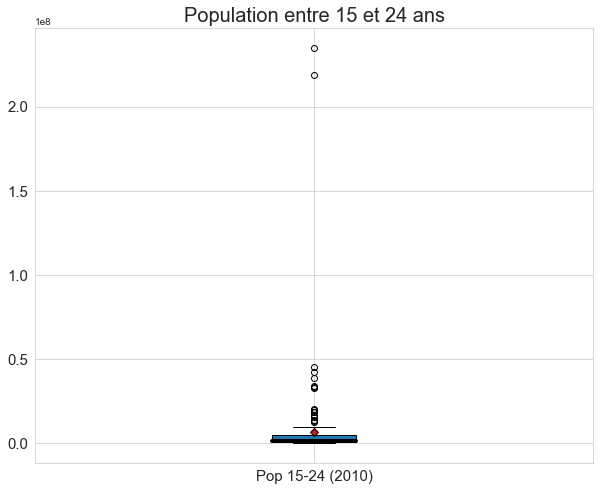

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
boxprops = dict(linestyle='-', linewidth=1, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
meanprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')

data_subset_1524.boxplot(column=['Pop 15-24 (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=True,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population entre 15 et 24 ans",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

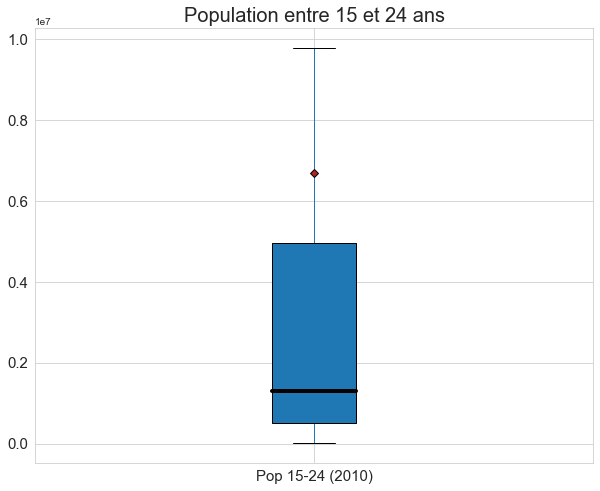

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_1524.boxplot(column=['Pop 15-24 (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=False,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population entre 15 et 24 ans",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Regardons la répartition de cet indicateur en fonction des zones géographiques

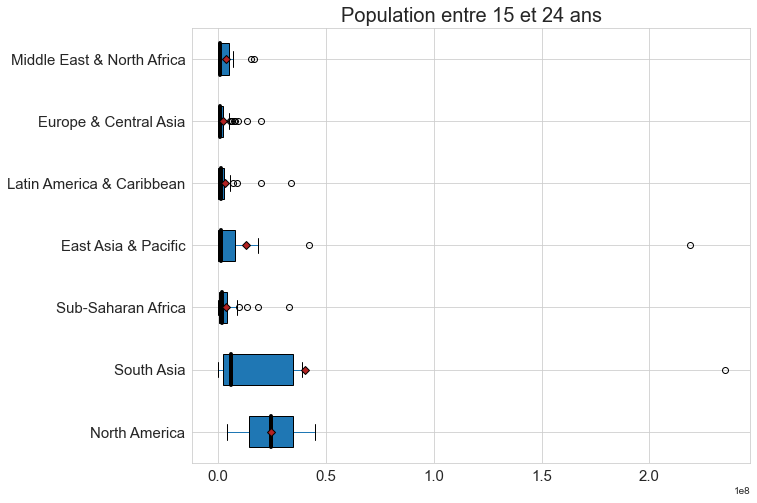

In [76]:
data_subset_1524 = data_subset_1524.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_1524.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Pop 15-24 (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population entre 15 et 24 ans",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Deux valeurs semblent trop importantes comparées aux autres. Il serait sage de les considérer comme des outliers.

In [77]:
outliers = data_subset_1524.loc[data_subset_1524['Pop 15-24 (2010)'] > 2.0e8]
outliers

,Country Code,Indicator Code,Pop 15-24 (2010),Region
34,CHN,SP.POP.1524.TO.UN,218974009.0,East Asia & Pacific
74,IND,SP.POP.1524.TO.UN,235056806.0,South Asia


L'Inde et la Chine semblent avoir une importante population entre 15 et 24 ans. 

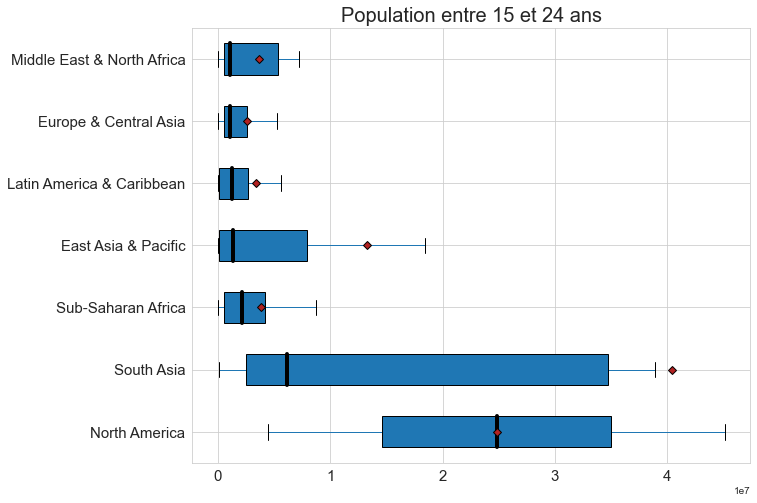

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(),boxprops = boxprops, showfliers=False, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population entre 15 et 24 ans",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

L'Asie du sud et l'Amérique du Nord semblent avoir la plus importante population entre 15 et 24 ans, avec les plus hautes valeurs médianes, les plus hautes moyennes et les écart-types les plus grands.

Cependant, il pourrait être intéressant de rapporter ces valeurs de population brutes à un pourcentage de jeunes entre 15 et 24 ans par rapport à la population globale.

Pour cela, on utilise la variable pop_totale crée précédemment.

In [79]:
for country in data_subset_1524['Country Code'].unique():
    population = pop_totale.loc[pop_totale['Country Code'] == country,'2010'].values
    jeunes = data_subset_1524.loc[data_subset_1524['Country Code'] == country,'Pop 15-24 (2010)'].values
    pct = (jeunes/population)*100
    data_subset_1524.loc[data_subset_1524['Country Code'] == country,'Pourcentage pop 15-24 (2010)'] = pct

data_subset_1524.sort_values('Pourcentage pop 15-24 (2010)',ascending=False).head(10)

,Country Code,Indicator Code,Pop 15-24 (2010),Region,Pourcentage pop 15-24 (2010)
36,COM,SP.POP.1524.TO.UN,178281.0,Sub-Saharan Africa,25.849365
28,KHM,SP.POP.1524.TO.UN,3534208.0,East Asia & Pacific,24.699645
27,CPV,SP.POP.1524.TO.UN,123314.0,Sub-Saharan Africa,24.545766
153,SWZ,SP.POP.1524.TO.UN,294783.0,Sub-Saharan Africa,24.507188
151,SDN,SP.POP.1524.TO.UN,8367575.0,Sub-Saharan Africa,24.334276
109,FSM,SP.POP.1524.TO.UN,25169.0,East Asia & Pacific,24.290650
52,ERI,SP.POP.1524.TO.UN,1057931.0,Sub-Saharan Africa,24.094046
180,ZWE,SP.POP.1524.TO.UN,3389035.0,Sub-Saharan Africa,24.059057
115,NAM,SP.POP.1524.TO.UN,518696.0,Sub-Saharan Africa,23.868174
93,LSO,SP.POP.1524.TO.UN,484549.0,Sub-Saharan Africa,23.745988


In [80]:
data_subset_1524.describe()

,Pop 15-24 (2010),Pourcentage pop 15-24 (2010)
count,1.810000e+02,181.000000
mean,6.685106e+06,17.844949
std,2.454837e+07,4.034655
min,1.329900e+04,6.612383
25%,5.159600e+05,14.383987
50%,1.309299e+06,18.717062
75%,4.949474e+06,21.052154
max,2.350568e+08,25.849365


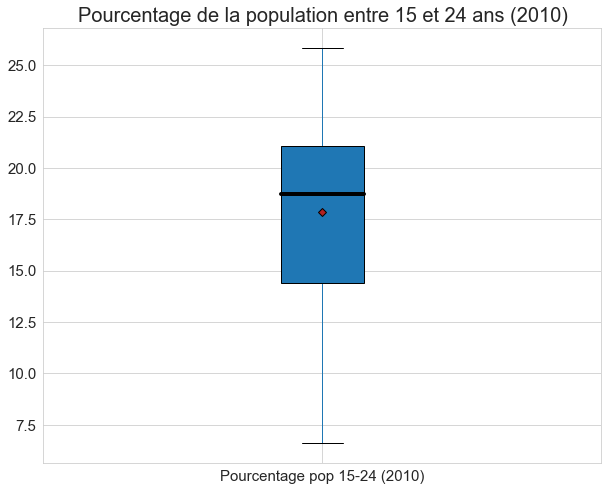

In [81]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_1524.boxplot(column=['Pourcentage pop 15-24 (2010)'], boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=True,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Pourcentage de la population entre 15 et 24 ans (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

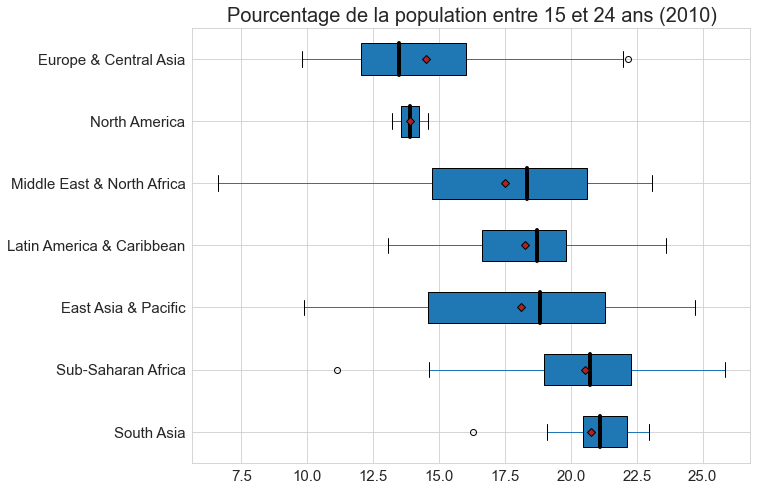

In [82]:
data_subset_1524 = data_subset_1524.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_1524.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Pourcentage pop 15-24 (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Pourcentage de la population entre 15 et 24 ans (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Cette fois-ci, ce sont l'Asie du sud et l'Afrique Sub-Saharienne qui ont la médiane la plus haute.

Avec ce pourcentage, on peut classer les pays en fonction de la proportion de jeunes dans leur population totale, et leur accorder des points pour le classement final.

Pour calculer les points attribués à chaque pays, il a été décidé de prendre la formule suivante:
(1 + Indicateur/max(Indicateur))
Le score final sera calculé en multipliant les points attribués à chaque indicateur.

In [83]:
data_subset_1524['Points pop 15-24 (2010)'] = (1+(data_subset_1524['Pourcentage pop 15-24 (2010)']/max(data_subset_1524['Pourcentage pop 15-24 (2010)'])))
data_subset_1524 = data_subset_1524.drop('Indicator Code',axis = 1)
data_subset_1524.sort_values('Points pop 15-24 (2010)',ascending=False).head(10)

,Country Code,Pop 15-24 (2010),Region,Pourcentage pop 15-24 (2010),Points pop 15-24 (2010)
36,COM,178281.0,Sub-Saharan Africa,25.849365,2.000000
28,KHM,3534208.0,East Asia & Pacific,24.699645,1.955522
27,CPV,123314.0,Sub-Saharan Africa,24.545766,1.949569
153,SWZ,294783.0,Sub-Saharan Africa,24.507188,1.948077
151,SDN,8367575.0,Sub-Saharan Africa,24.334276,1.941388
109,FSM,25169.0,East Asia & Pacific,24.290650,1.939700
52,ERI,1057931.0,Sub-Saharan Africa,24.094046,1.932094
180,ZWE,3389035.0,Sub-Saharan Africa,24.059057,1.930741
115,NAM,518696.0,Sub-Saharan Africa,23.868174,1.923356
93,LSO,484549.0,Sub-Saharan Africa,23.745988,1.918629


On vérifie qu'il n'y a aucune valeur manquante et aucun doublon.

In [84]:
data_subset_1524.isnull().sum()

Country Code                    0
Pop 15-24 (2010)                0
Region                          0
Pourcentage pop 15-24 (2010)    0
Points pop 15-24 (2010)         0
dtype: int64

In [85]:
data_subset_1524.loc[data_subset_1524[['Country Code']].duplicated(keep=False),:]

,Country Code,Pop 15-24 (2010),Region,Pourcentage pop 15-24 (2010),Points pop 15-24 (2010)


## <a class="anchor" id="section_4_2">2.  Indicateurs démographiques : croissance démographique</a>

On crée le sous-ensemble avec les valeurs liées à l'indicateur pour l'évolution démographique.

In [86]:
data_subset_growth = data_subset.loc[data_subset['Indicator Code'] == 'SP.POP.GROW']
data_subset_growth = data_subset_growth.rename(columns={'2010':'Croissance démo en % (2010)'})
data_subset_growth.describe()

,Croissance démo en % (2010)
count,214.000000
mean,1.425929
std,1.566354
min,-3.333512
25%,0.471051
50%,1.257066
75%,2.276987
max,11.220686


In [87]:
stats = data_subset_growth.describe()
name_ind = 'Croissance démo en % (2010)'
print('La moyenne pour l\'indicateur',name_ind,'est de',stats.loc['mean','Croissance démo en % (2010)'])
print('La médiane pour l\'indicateur',name_ind,'est de',stats.loc['50%','Croissance démo en % (2010)'])
print('L\'écart-type pour l\'indicateur',name_ind,'est de',stats.loc['std','Croissance démo en % (2010)'])

La moyenne pour l'indicateur Croissance démo en % (2010) est de 1.4259293279258185
La médiane pour l'indicateur Croissance démo en % (2010) est de 1.2570657912079501
L'écart-type pour l'indicateur Croissance démo en % (2010) est de 1.5663541125097253


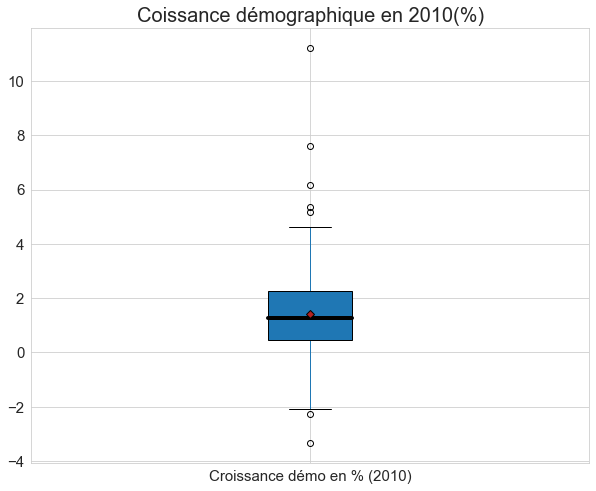

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_growth.boxplot(column=['Croissance démo en % (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=True,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Coissance démographique en 2010(%)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [89]:
print(data_subset_growth.shape[0],'pays sont considérés.')

214 pays sont considérés.


Observons sa répartition géographique.

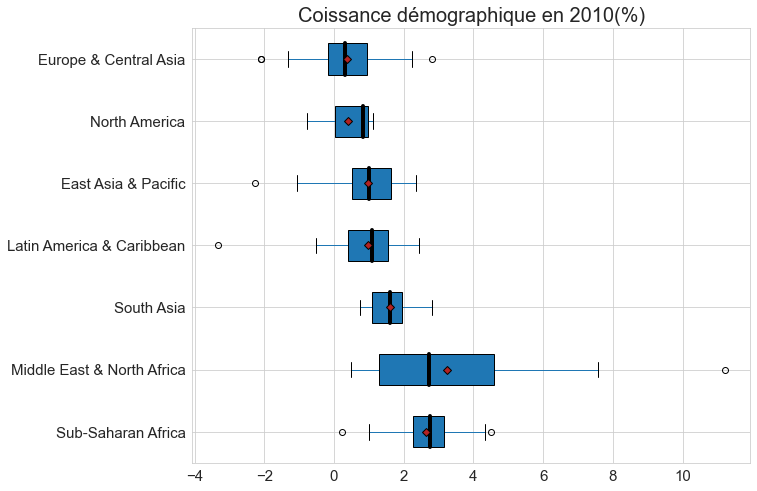

In [90]:
data_subset_growth = data_subset_growth.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_growth.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Croissance démo en % (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Coissance démographique en 2010(%)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Le Moyen Orient & l'Afrique semblent afficher la plus importante croissance démographique avec les plus hautes médianes et moyennes.

In [91]:
data_subset_growth.sort_values('Croissance démo en % (2010)', ascending = False).head(10)

,Country Code,Indicator Code,Croissance démo en % (2010),Region
155,QAT,SP.POP.GROW,11.220686,Middle East & North Africa
201,ARE,SP.POP.GROW,7.587098,Middle East & North Africa
103,KWT,SP.POP.GROW,6.161251,Middle East & North Africa
144,OMN,SP.POP.GROW,5.352636,Middle East & North Africa
96,JOR,SP.POP.GROW,5.160910,Middle East & North Africa
14,BHR,SP.POP.GROW,4.603905,Middle East & North Africa
59,GNQ,SP.POP.GROW,4.515622,Sub-Saharan Africa
174,SSD,SP.POP.GROW,4.320565,Sub-Saharan Africa
140,NER,SP.POP.GROW,3.794963,Sub-Saharan Africa
107,LBN,SP.POP.GROW,3.614939,Middle East & North Africa


Attribuons maintenant les points liés à cet indicateur, en employant la même méthode que précédemment. 

In [92]:
data_subset_growth['Points croissance démo (2010)'] = (1+(data_subset_growth['Croissance démo en % (2010)']/max(data_subset_growth['Croissance démo en % (2010)'])))
data_subset_growth.loc[data_subset_growth['Points croissance démo (2010)'] < 1] == 1
#data_subset_growth = data_subset_growth.drop('Indicator Code',axis = 1)
data_subset_growth.sort_values('Points croissance démo (2010)',ascending=False).head(10)

,Country Code,Indicator Code,Croissance démo en % (2010),Region,Points croissance démo (2010)
155,QAT,SP.POP.GROW,11.220686,Middle East & North Africa,2.000000
201,ARE,SP.POP.GROW,7.587098,Middle East & North Africa,1.676171
103,KWT,SP.POP.GROW,6.161251,Middle East & North Africa,1.549098
144,OMN,SP.POP.GROW,5.352636,Middle East & North Africa,1.477033
96,JOR,SP.POP.GROW,5.160910,Middle East & North Africa,1.459946
14,BHR,SP.POP.GROW,4.603905,Middle East & North Africa,1.410305
59,GNQ,SP.POP.GROW,4.515622,Sub-Saharan Africa,1.402437
174,SSD,SP.POP.GROW,4.320565,Sub-Saharan Africa,1.385054
140,NER,SP.POP.GROW,3.794963,Sub-Saharan Africa,1.338211
107,LBN,SP.POP.GROW,3.614939,Middle East & North Africa,1.322167


In [93]:
data_subset_growth.isnull().sum()

Country Code                     0
Indicator Code                   0
Croissance démo en % (2010)      0
Region                           0
Points croissance démo (2010)    0
dtype: int64

In [94]:
data_subset_growth.loc[data_subset_growth[['Country Code']].duplicated(keep=False),:]

,Country Code,Indicator Code,Croissance démo en % (2010),Region,Points croissance démo (2010)


## <a class="anchor" id="section_4_3">3.  Indicateur pour l'accès à internet</a>

On crée le sous-ensemble pour l'indicateur d'accès à internet.

In [95]:
data_subset_internet = data_subset.loc[data_subset['Indicator Code'].isin(['IT.NET.USER.P2'])]
data_subset_internet = data_subset_internet.rename(columns={'2010':'Utilisateurs internet en % (2010)'})
data_subset_internet.describe()

,Utilisateurs internet en % (2010)
count,201.000000
mean,34.107044
std,27.404923
min,0.000000
25%,8.000000
50%,30.000000
75%,54.040000
max,93.390000


In [96]:
stats = data_subset_internet.describe()
name_ind = 'Utilisateurs internet en % (2010)'
print('La moyenne pour l\'indicateur',name_ind,'est de',stats.loc['mean','Utilisateurs internet en % (2010)'])
print('La médiane pour l\'indicateur',name_ind,'est de',stats.loc['50%','Utilisateurs internet en % (2010)'])
print('L\'écart-type pour l\'indicateur',name_ind,'est de',stats.loc['std','Utilisateurs internet en % (2010)'])

La moyenne pour l'indicateur Utilisateurs internet en % (2010) est de 34.107043781094525
La médiane pour l'indicateur Utilisateurs internet en % (2010) est de 30.0
L'écart-type pour l'indicateur Utilisateurs internet en % (2010) est de 27.404923464977497


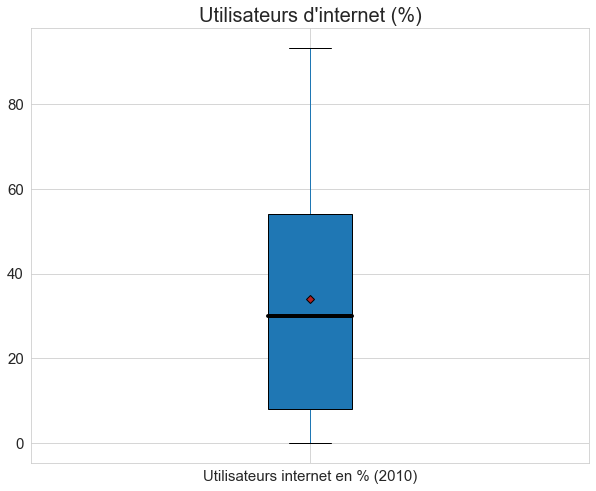

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_internet.boxplot(column=['Utilisateurs internet en % (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=True,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Utilisateurs d'internet (%)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [98]:
print(data_subset_internet.shape[0],'pays sont considérés.')

201 pays sont considérés.


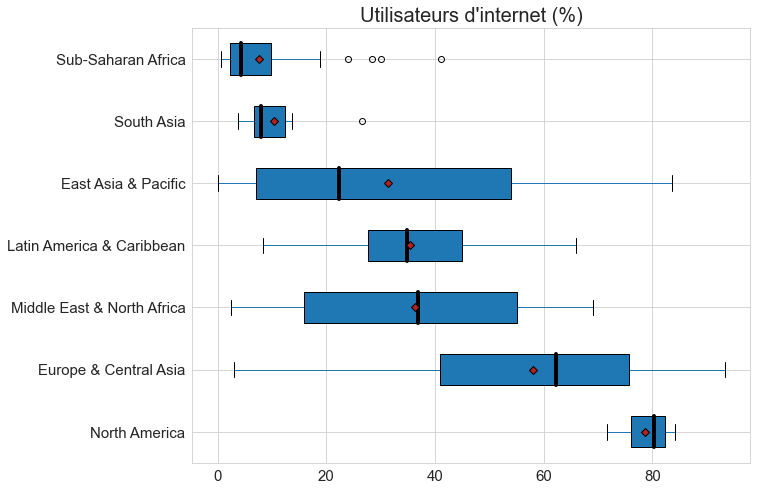

In [99]:
data_subset_internet = data_subset_internet.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_internet.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Utilisateurs internet en % (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), showfliers=True,boxprops = boxprops, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Utilisateurs d'internet (%)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

L'Europe, l'Asie centrale et l'Amérique du Nord semblent être majoritairement avantagées avec les plus hautes médianes.

In [100]:
data_subset_internet.sort_values('Utilisateurs internet en % (2010)', ascending = False).head(10)

,Country Code,Indicator Code,Utilisateurs internet en % (2010),Region
137,NOR,IT.NET.USER.P2,93.39,Europe & Central Asia
82,ISL,IT.NET.USER.P2,93.39,Europe & Central Asia
131,NLD,IT.NET.USER.P2,90.72,Europe & Central Asia
108,LUX,IT.NET.USER.P2,90.62,Europe & Central Asia
172,SWE,IT.NET.USER.P2,90.00,Europe & Central Asia
49,DNK,IT.NET.USER.P2,88.72,Europe & Central Asia
62,FIN,IT.NET.USER.P2,86.89,Europe & Central Asia
189,GBR,IT.NET.USER.P2,85.00,Europe & Central Asia
20,BMU,IT.NET.USER.P2,84.21,North America
173,CHE,IT.NET.USER.P2,83.90,Europe & Central Asia


Attribuons maintenant les points liés à cet indicateur, en employant la même méthode que précédemment. 

In [101]:
data_subset_internet['Points internet (2010)'] = (1+(data_subset_internet['Utilisateurs internet en % (2010)']/max(data_subset_internet['Utilisateurs internet en % (2010)'])))
data_subset_internet = data_subset_internet.drop('Indicator Code',axis = 1)
data_subset_internet.sort_values('Points internet (2010)',ascending=False).head(10)

,Country Code,Utilisateurs internet en % (2010),Region,Points internet (2010)
137,NOR,93.39,Europe & Central Asia,2.000000
82,ISL,93.39,Europe & Central Asia,2.000000
131,NLD,90.72,Europe & Central Asia,1.971410
108,LUX,90.62,Europe & Central Asia,1.970339
172,SWE,90.00,Europe & Central Asia,1.963701
49,DNK,88.72,Europe & Central Asia,1.949995
62,FIN,86.89,Europe & Central Asia,1.930399
189,GBR,85.00,Europe & Central Asia,1.910162
20,BMU,84.21,North America,1.901703
173,CHE,83.90,Europe & Central Asia,1.898383


In [102]:
data_subset_internet.isnull().sum()

Country Code                         0
Utilisateurs internet en % (2010)    0
Region                               0
Points internet (2010)               0
dtype: int64

In [103]:
data_subset_internet.loc[data_subset_internet[['Country Code']].duplicated(keep=False),:]

,Country Code,Utilisateurs internet en % (2010),Region,Points internet (2010)


## <a class="anchor" id="section_4_4">4. Indicateur pour l'éducation dans le secondaire</a>

On crée le sous-ensemble pour l'indicateur pour l'éducation dans le secondaire.

In [104]:
data_subset_edu_sec = data_subset.loc[data_subset['Indicator Code'].isin(['SE.SEC.ENRL'])]
data_subset_edu_sec = data_subset_edu_sec.rename(columns={'2010':'Population 15-24 inscrite dans secondaire (2010)'})
data_subset_edu_sec.describe()

,Population 15-24 inscrite dans secondaire (2010)
count,1.500000e+02
mean,3.294800e+06
std,1.227897e+07
min,2.334000e+03
25%,1.137538e+05
50%,5.689885e+05
75%,2.275550e+06
max,1.076869e+08


In [105]:
stats = data_subset_edu_sec.describe()
name_ind = 'Population 15-24 inscrite dans secondaire (2010)'
print('La moyenne pour l\'indicateur',name_ind,'est de',stats.loc['mean','Population 15-24 inscrite dans secondaire (2010)'])
print('La médiane pour l\'indicateur',name_ind,'est de',stats.loc['50%','Population 15-24 inscrite dans secondaire (2010)'])
print('L\'écart-type pour l\'indicateur',name_ind,'est de',stats.loc['std','Population 15-24 inscrite dans secondaire (2010)'])

La moyenne pour l'indicateur Population 15-24 inscrite dans secondaire (2010) est de 3294800.24
La médiane pour l'indicateur Population 15-24 inscrite dans secondaire (2010) est de 568988.5
L'écart-type pour l'indicateur Population 15-24 inscrite dans secondaire (2010) est de 12278968.258372987


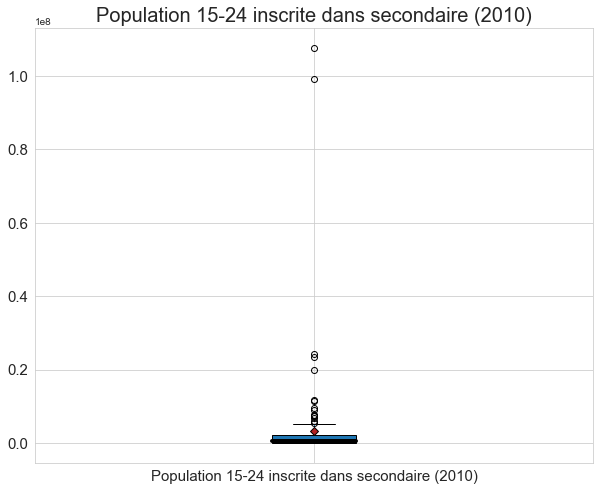

In [106]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_edu_sec.boxplot(column=['Population 15-24 inscrite dans secondaire (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=True,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population 15-24 inscrite dans secondaire (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

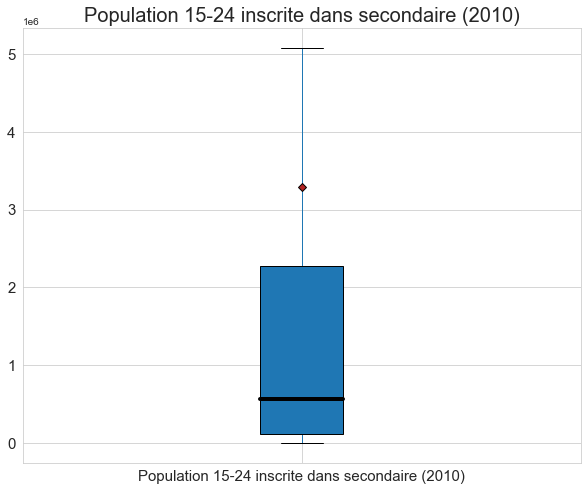

In [107]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_edu_sec.boxplot(column=['Population 15-24 inscrite dans secondaire (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, showfliers=False,patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population 15-24 inscrite dans secondaire (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [108]:
print(data_subset_edu_sec.shape[0],'pays sont considérés.')

150 pays sont considérés.


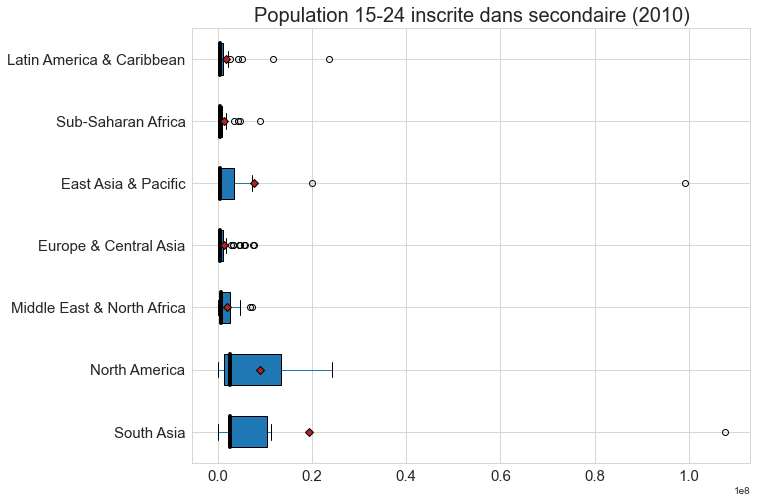

In [109]:
data_subset_edu_sec = data_subset_edu_sec.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_edu_sec.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Population 15-24 inscrite dans secondaire (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), showfliers=True, boxprops = boxprops,medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population 15-24 inscrite dans secondaire (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Deux valeurs semblent trop importantes comparées aux autres. Il serait sage de les considérer comme des outliers.

In [110]:
outliers = data_subset_edu_sec.loc[data_subset_edu_sec['Population 15-24 inscrite dans secondaire (2010)'] > 0.8e8]
outliers

,Country Code,Indicator Code,Population 15-24 inscrite dans secondaire (2010),Region
31,CHN,SE.SEC.ENRL,99218080.0,East Asia & Pacific
60,IND,SE.SEC.ENRL,107686864.0,South Asia


Encore une fois, l'Inde et la Chine.

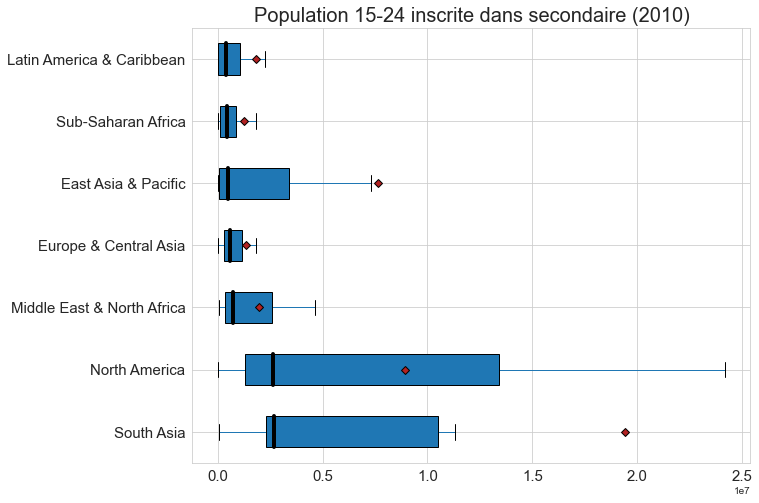

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), showfliers=False, boxprops = boxprops,medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Population 15-24 inscrite dans secondaire (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

L'Amérique du nord et l'Asie du sud devant les autres régions, avec les plus ahutes valeurs, médianes et moyennes. 

Comme pour la population 15/24 il pourrait être intéressant de calculer le pourcentage de jeunes entre 15 et 24 ans inscrits dans le secondaire. Cependant, les variables Population 15-24 (2010) et Population 15-24 inscrite dans secondaire (2010) semblent avoir une longue liste de pays non en commun. 

In [112]:
no_value_countries = []
for country in data_subset_edu_sec['Country Code'].unique():
    if country not in data_subset_1524['Country Code'].unique():
        no_value_countries.append(country)
len(no_value_countries)
no_value_countries

['AND',
 'ATG',
 'BMU',
 'DMA',
 'LIE',
 'MCO',
 'MNE',
 'PRI',
 'SMR',
 'SRB',
 'SYC',
 'KNA']

12 pays devront être écartésn ce qui constitue presque 10% des pays considérés pour cet indicateur. On garde donc la population pour attribuer les points. 

In [113]:
data_subset_edu_sec['Points secondaire (2010)'] = (1+(data_subset_edu_sec['Population 15-24 inscrite dans secondaire (2010)']/max(data_subset_edu_sec['Population 15-24 inscrite dans secondaire (2010)'])))
data_subset_edu_sec = data_subset_edu_sec.drop('Indicator Code',axis = 1)
data_subset_edu_sec.sort_values('Points secondaire (2010)',ascending=False).head(10)

,Country Code,Population 15-24 inscrite dans secondaire (2010),Region,Points secondaire (2010)
60,IND,107686864.0,South Asia,2.000000
31,CHN,99218080.0,East Asia & Pacific,1.921357
143,USA,24192786.0,North America,1.224659
22,BRA,23538716.0,Latin America & Caribbean,1.218585
61,IDN,19975916.0,East Asia & Pacific,1.185500
88,MEX,11681530.0,Latin America & Caribbean,1.108477
13,BGD,11334055.0,South Asia,1.105250
103,PAK,9654940.0,South Asia,1.089658
101,NGA,9056768.0,Sub-Saharan Africa,1.084103
51,DEU,7663755.0,Europe & Central Asia,1.071167


In [114]:
data_subset_edu_sec.isnull().sum()

Country Code                                        0
Population 15-24 inscrite dans secondaire (2010)    0
Region                                              0
Points secondaire (2010)                            0
dtype: int64

In [115]:
data_subset_edu_sec.loc[data_subset_edu_sec[['Country Code']].duplicated(keep=False),:]

,Country Code,Population 15-24 inscrite dans secondaire (2010),Region,Points secondaire (2010)


## <a class="anchor" id="section_4_5">5. Indicateur pour l'éducation dans le tertiaire</a>

On crée le sous-ensemble pour l'indicateur pour l'éducation dans le tertiaire.

In [116]:
data_subset_edu_ter = data_subset.loc[data_subset['Indicator Code'].isin(['UIS.TE_100000.56'])]
data_subset_edu_ter = data_subset_edu_ter.rename(columns={'2010':'Pop inscrite dans tertiaire pour 100,000 (2010)'})
data_subset_edu_ter.describe()

,"Pop inscrite dans tertiaire pour 100,000 (2010)"
count,136.000000
mean,2972.967420
std,1888.841387
min,69.709702
25%,1218.276367
50%,2988.322510
75%,4334.308716
max,7082.274414


In [117]:
stats = data_subset_edu_ter.describe()
name_ind = 'Pop inscrite dans tertiaire pour 100,000 (2010)'
print('La moyenne pour l\'indicateur',name_ind,'est de',stats.loc['mean','Pop inscrite dans tertiaire pour 100,000 (2010)'])
print('La médiane pour l\'indicateur',name_ind,'est de',stats.loc['50%','Pop inscrite dans tertiaire pour 100,000 (2010)'])
print('L\'écart-type pour l\'indicateur',name_ind,'est de',stats.loc['std','Pop inscrite dans tertiaire pour 100,000 (2010)'])

La moyenne pour l'indicateur Pop inscrite dans tertiaire pour 100,000 (2010) est de 2972.967420353609
La médiane pour l'indicateur Pop inscrite dans tertiaire pour 100,000 (2010) est de 2988.32250976563
L'écart-type pour l'indicateur Pop inscrite dans tertiaire pour 100,000 (2010) est de 1888.8413871286928


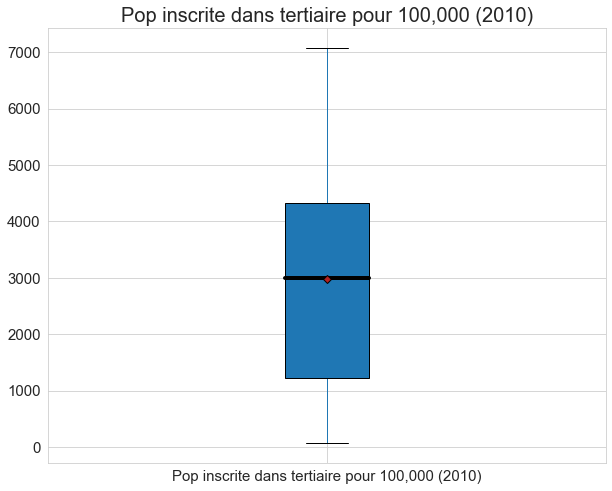

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
data_subset_edu_ter.boxplot(column=['Pop inscrite dans tertiaire pour 100,000 (2010)'],boxprops = boxprops,medianprops=medianprops,vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Pop inscrite dans tertiaire pour 100,000 (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [119]:
print(data_subset_edu_ter.shape[0],'pays sont considérés.')

136 pays sont considérés.


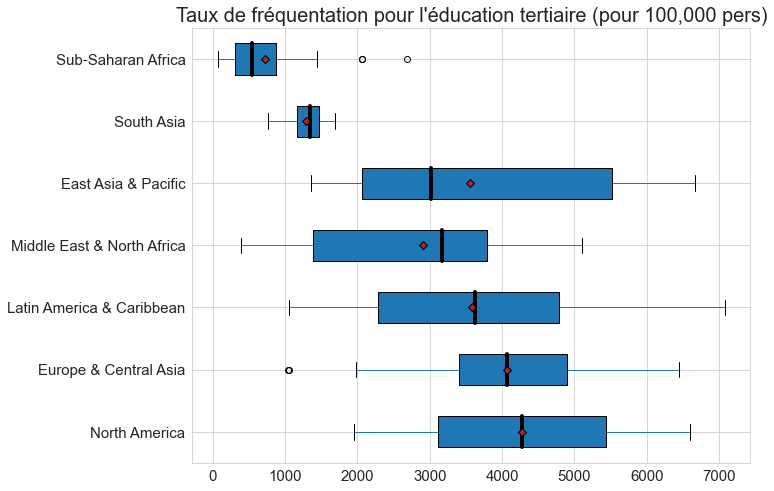

In [120]:
data_subset_edu_ter = data_subset_edu_ter.merge(countries[['Country Code','Region']],how='left')
grouped = data_subset_edu_ter.groupby(['Region'])
df2 = pd.DataFrame({col:vals['Pop inscrite dans tertiaire pour 100,000 (2010)'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
df2.boxplot(labels=countries['Region'].unique(), showfliers=True,boxprops = boxprops, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Taux de fréquentation pour l'éducation tertiaire (pour 100,000 pers)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

L'Amérique du nord, L'asie de l'est et Pacifique sont en tête des régions.

In [121]:
data_subset_edu_ter.sort_values('Pop inscrite dans tertiaire pour 100,000 (2010)', ascending = False).head(10)

,Country Code,Indicator Code,"Pop inscrite dans tertiaire pour 100,000 (2010)",Region
33,CUB,UIS.TE_100000.56,7082.274414,Latin America & Caribbean
100,PRI,UIS.TE_100000.56,6722.213379,Latin America & Caribbean
64,KOR,UIS.TE_100000.56,6660.228516,East Asia & Pacific
129,USA,UIS.TE_100000.56,6592.216797,North America
71,LTU,UIS.TE_100000.56,6448.403320,Europe & Central Asia
3,ARG,UIS.TE_100000.56,6115.500000,Latin America & Caribbean
84,MNG,UIS.TE_100000.56,6110.945801,East Asia & Pacific
90,NZL,UIS.TE_100000.56,6093.622070,East Asia & Pacific
10,BLR,UIS.TE_100000.56,5992.042480,Europe & Central Asia
27,CHL,UIS.TE_100000.56,5804.526855,Latin America & Caribbean


On attribue les points aux pays pour cet indicateur.

In [122]:
data_subset_edu_ter['Points tertiaire (2010)'] = (1+(data_subset_edu_ter['Pop inscrite dans tertiaire pour 100,000 (2010)']/max(data_subset_edu_ter['Pop inscrite dans tertiaire pour 100,000 (2010)'])))
data_subset_edu_ter = data_subset_edu_ter.drop('Indicator Code',axis = 1)
data_subset_edu_ter.sort_values('Points tertiaire (2010)',ascending=False).head(10)

,Country Code,"Pop inscrite dans tertiaire pour 100,000 (2010)",Region,Points tertiaire (2010)
33,CUB,7082.274414,Latin America & Caribbean,2.000000
100,PRI,6722.213379,Latin America & Caribbean,1.949160
64,KOR,6660.228516,East Asia & Pacific,1.940408
129,USA,6592.216797,North America,1.930805
71,LTU,6448.403320,Europe & Central Asia,1.910499
3,ARG,6115.500000,Latin America & Caribbean,1.863494
84,MNG,6110.945801,East Asia & Pacific,1.862851
90,NZL,6093.622070,East Asia & Pacific,1.860405
10,BLR,5992.042480,Europe & Central Asia,1.846062
27,CHL,5804.526855,Latin America & Caribbean,1.819585


In [123]:
data_subset_edu_ter.isnull().sum()

Country Code                                       0
Pop inscrite dans tertiaire pour 100,000 (2010)    0
Region                                             0
Points tertiaire (2010)                            0
dtype: int64

In [124]:
data_subset_edu_ter.loc[data_subset_edu_ter[['Country Code']].duplicated(keep=False),:]

,Country Code,"Pop inscrite dans tertiaire pour 100,000 (2010)",Region,Points tertiaire (2010)


# <a class="anchor" id="chapter5">V. Classement final des pays et conclusion de l'analyse  </a>

Calculons le score final pour les pays.

Associons les données dans un seul jeu de données. 

In [125]:
final_class = countries.merge(data_subset_1524[['Country Code','Points pop 15-24 (2010)']], how = 'left')
final_class = final_class.merge(data_subset_growth[['Country Code','Points croissance démo (2010)']], how = 'left')
final_class = final_class.merge(data_subset_internet[['Country Code','Points internet (2010)']], how = 'left')
final_class = final_class.merge(data_subset_edu_sec[['Country Code','Points secondaire (2010)']], how = 'left')
final_class = final_class.merge(data_subset_edu_ter[['Country Code','Points tertiaire (2010)']], how = 'left')
final_class.head(3)

,Country Code,Short Name,Region,Income Group,Income Point,Points pop 15-24 (2010),Points croissance démo (2010),Points internet (2010),Points secondaire (2010),Points tertiaire (2010)
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2.0,1.506035,1.018954,1.663883,1.000068,1.323819
1,AFG,Afghanistan,South Asia,Low income,0.0,1.817983,1.250664,1.042831,1.018982,NaN
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,1.0,1.624918,1.318171,1.029982,1.007896,NaN


In [126]:
#final_class['Country Code'].value_counts()

In [127]:
final_class['Score Total (2010)'] = final_class['Income Point'] * final_class['Points pop 15-24 (2010)'] * final_class['Points croissance démo (2010)'] * final_class['Points internet (2010)'] * final_class['Points secondaire (2010)'] * final_class['Points tertiaire (2010)']
final_class.sort_values('Score Total (2010)', ascending = False).head(10)

,Country Code,Short Name,Region,Income Group,Income Point,Points pop 15-24 (2010),Points croissance démo (2010),Points internet (2010),Points secondaire (2010),Points tertiaire (2010),Score Total (2010)
201,USA,United States,North America,High income: OECD,2.0,1.564464,1.074543,1.767641,1.224659,1.930805,14.052927
104,KOR,Korea,East Asia & Pacific,High income: OECD,2.0,1.516780,1.044402,1.896242,1.036768,1.940408,12.086174
146,NZL,New Zealand,East Asia & Pacific,High income: OECD,2.0,1.553890,1.099078,1.861548,1.004756,1.860405,11.885605
10,AUS,Australia,East Asia & Pacific,High income: OECD,2.0,1.511726,1.138627,1.813792,1.021195,1.813239,11.562072
144,NOR,Norway,Europe & Central Asia,High income: OECD,2.0,1.495196,1.111015,2.000000,1.004040,1.648667,10.999230
92,ISL,Iceland,Europe & Central Asia,High income: OECD,2.0,1.544120,0.987175,2.000000,1.000331,1.801390,10.987195
180,SWE,Sweden,Europe & Central Asia,High income: OECD,2.0,1.507240,1.075978,1.963701,1.006791,1.684784,10.803743
62,FIN,Finland,Europe & Central Asia,High income: OECD,2.0,1.473329,1.040772,1.930399,1.003963,1.798501,10.689588
93,ISR,Israel,Middle East & North Africa,High income: OECD,2.0,1.570043,1.162802,1.722775,1.006578,1.685741,10.673680
117,MAC,"Macao SAR, China",East Asia & Pacific,High income: nonOECD,2.0,1.573013,1.195586,1.591048,1.000355,1.778477,10.647040


Regardons en détail les 10 premiers pays.

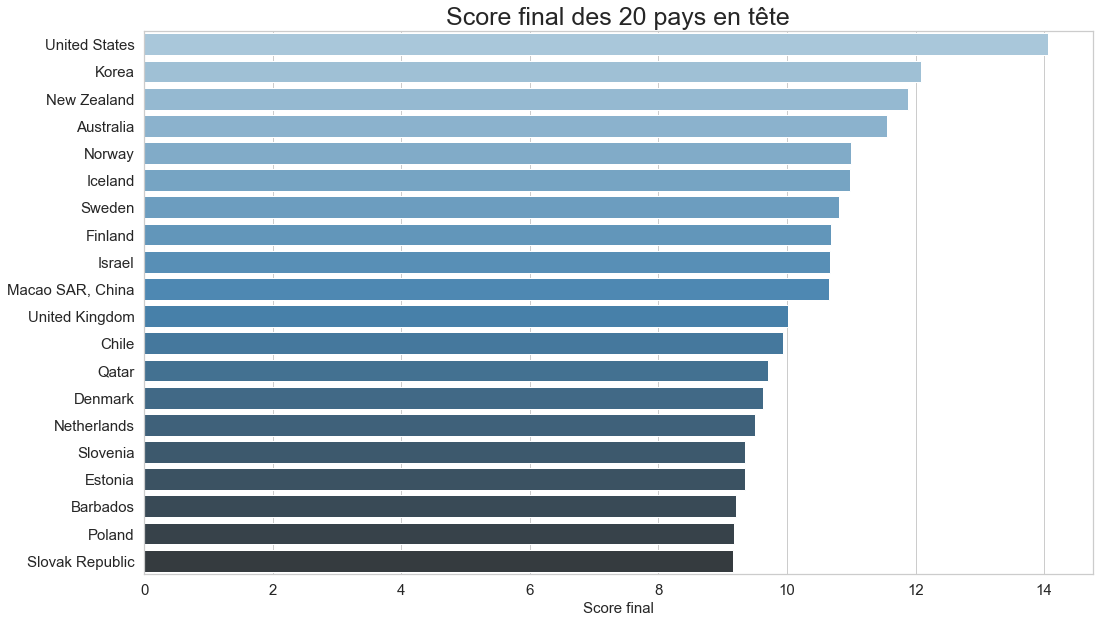

In [128]:
final_class = final_class.sort_values('Score Total (2010)', ascending = False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(17,10))
sns.barplot(x = 'Score Total (2010)',y = 'Short Name',data=final_class.iloc[:20],palette="Blues_d")
plt.title("Score final des 20 pays en tête",fontsize = 25)
plt.xticks(fontsize = 15)
plt.xlabel('Score final',fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('',fontsize = 20)
plt.show()

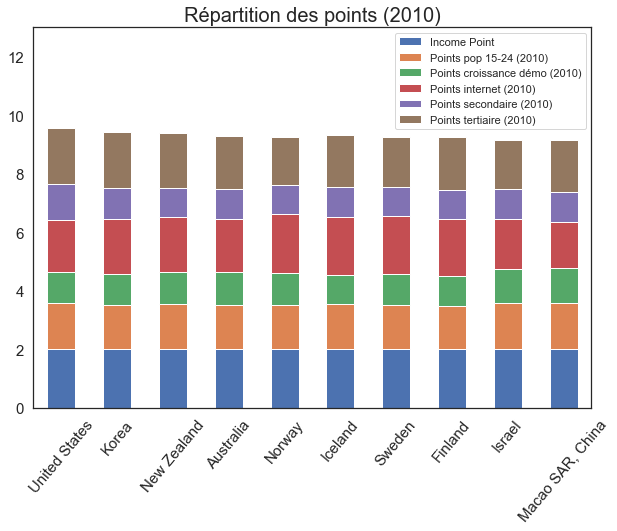

In [129]:
sns.set_style("white")
final_class_rep = final_class[['Short Name','Region','Income Point','Points pop 15-24 (2010)','Points croissance démo (2010)','Points internet (2010)','Points secondaire (2010)','Points tertiaire (2010)']].iloc[:10]
final_class_rep.set_index("Short Name",drop=True,inplace=True)
final_class_rep.plot.bar(stacked=True, rot = 50,figsize=(10, 7),ylim = [0,13])
plt.title("Répartition des points (2010)",fontsize = 20)
plt.xticks(fontsize = 15)
plt.xlabel('',fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

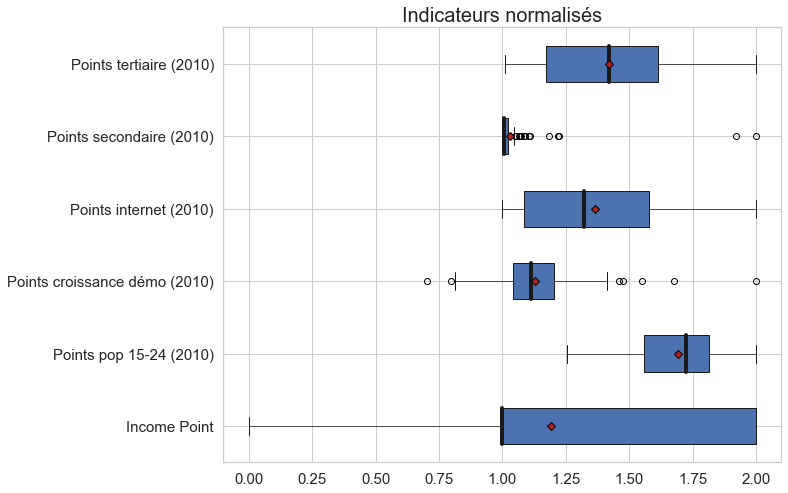

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
boxprops = dict(linestyle='-', linewidth=1, color='k')
final_class_ind = final_class[['Short Name','Region','Income Point','Points pop 15-24 (2010)','Points croissance démo (2010)','Points internet (2010)','Points secondaire (2010)','Points tertiaire (2010)']]
final_class_ind.boxplot(boxprops = boxprops,showfliers=True, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Indicateurs normalisés",fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [131]:
final_class_10 = final_class[:10]
final_class_10['Region'].value_counts()

East Asia & Pacific           4
Europe & Central Asia         4
North America                 1
Middle East & North Africa    1
Name: Region, dtype: int64

Les régions à favoriser semblent être: 

 - **L'Asie de l'Est et le Pacifique**, regroupant la Corée, la Nouvelle-Zélande, l'Australie et Macao
 - **L'Europe**, regroupant l'Islande, la Norvège, la Finlande et la Suède.
 
 Mais il semblerait également que les **Etats-Unis** et **Israël** soient de potentiels candidats. 